In [8]:
# Pattern Recognition - Electrical & Computer Engineering
# 2023 Aristotle University Thessaloniki
# @authors: Antonios Antoniou 9482, Konstantinos Kalamaras 9716
# @emails: aantonii@ece.auth.gr, kkalamar@ece.auth.gr
# Deliverables A, B, C of the semester assignment.

In [9]:
# First, we load the data. We then have to:
#  - Split it into the training and testing set (50%-50%)
#  - Split each of those sets into the features and labels (which is the last column)

import numpy as np
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

filename = "dataset.csv"
ds = np.loadtxt(filename, delimiter=",", dtype=np.float64)
train_set, test_set = model_selection.train_test_split(ds, test_size=0.5, shuffle=True, random_state=0)
X_train, y_train = train_set[:, 0:2], train_set[:, 2]
X_test, y_test = test_set[:, 0:2], test_set[:, 2]

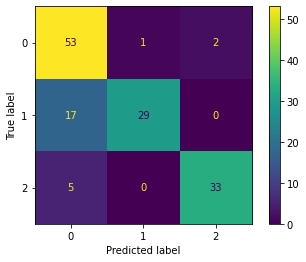

In [10]:
# The Gaussian Naive Bayes classifier, by default assumes different covariance matrices for each class.
# See here: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# The `var_` attribute keeps the different variances of each feature, for each class.
# The rest of the entries of the covariance matrix (i.e. {i,j:i!=j}) are zero,
# because Naive Bayes assumes iid features.

""" !
We will rule out the actual algorithm used in the background by sklearn
(Since we need one implementation where covariance matrices are the same for all classes, and one with different ones).
We build an example in order to test the rest of the question.
We still need to visualize the results, i.e. show the decision bounds and misclassified samples.
! """

from sklearn.naive_bayes import GaussianNB

gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

p = gauss_model.predict(X_test)
cm = confusion_matrix(y_test, p)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
